<a href="https://colab.research.google.com/github/Bmogul/BurhanuddinMogul-cs490-hw2/blob/main/Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment
## CS370
Replicating the procedure done by Thomas Ward ([here](https://https://thomasward.com/simulating-correlated-data/)).

***

## Problem 1
A surgeon analyzes surgical videos and models events that occur. Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by including adequate explanation of the code in either markdown cells or inline to the code. You can insert as many markdown or code cells you need to perform the analysis.
***

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import scipy.stats as stats

def drawScatter(matrix, columns):
  df = pd.DataFrame(data=matrix, columns=columns)
  scatterplot = scatter_matrix(df, alpha=0.4, figsize=(8,4), diagonal=None, color='black')
  for row, subplots in enumerate(scatterplot):
    for col, subplot in enumerate(subplots):
        if row == col:
            subplot.text(0.5, 0.5, df.columns[row], transform=subplot.transAxes, fontsize=12, ha='center', va='center')

### Problem 1a
Generate the `gs` variable.
***
the `gs` variable is a sample of 1000 glove sizes normally distributed centerd around the mean of 7.25 with a standard deviation of 0.875

In [9]:
gs = np.random.normal(7.25, 0.875, 10000)
print(gs)

[6.23967659 6.96480382 6.61633653 ... 8.52340755 7.53490445 8.38019744]


### Problem 1b
We have three variables, `ak`, `pp`, and `ptime`. Generate these variables from Multivariate Gaussian distribution and replicate the associated plots
***


#### Creating the samples
because `ak`, `pp` and `ptime` are all correlated, we need to create a sample for each variable from a Multivaritae Gaussian distribution. To do so we first need a covariance matrix `sigma` based on the correlations defined by Thomas Ward

$$\Sigma=\begin{bmatrix}1.0&0.6&-0.9\\0.6&1.0&-0.5\\-0.9&-0.5&1.0\end{bmatrix}$$

In [98]:
sigma = np.array([[1.0,0.6,-0.9],
                    [0.6,1.0,-0.5],
                    [-0.9,-0.5,1.0]])

to create the sample we can use the `numpy.random.multivariate_normal()` function. This function would be equivalent to the `mvnorm` function that Thomas Ward had created using R

In [99]:
mu = [0,0,0]
numSamples = 10000
APT = np.random.multivariate_normal(mu, sigma, numSamples)

The variable `mu` is the mean vector which is all 0's as no mean was defined for the three variables.
Thomas Ward had also created a sample size of 10000.

APT is a 2d array in which each row corresponds to a sample and each column corresponds to a variable
***


#### Defining `ak`, `pp`, `ptime` and creating the plots

Using the `pandas` library, we can create a scatterplot to show the different samples and how each variable correlates with each other

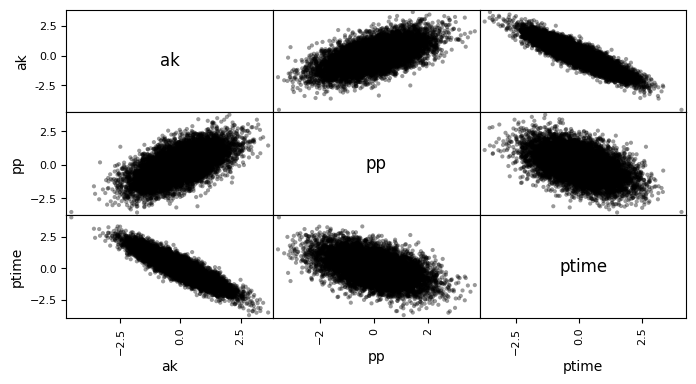

In [129]:
columns = ['ak','pp','ptime']
df = pd.DataFrame(data=APT, columns=columns)
drawScatter(APT, columns)
plt.show()

The scatterplot shows us the correlations that we would expect based on the covariances we defined in `sigma`

below we make histograms for `ak`, `pp`, and `ptime`

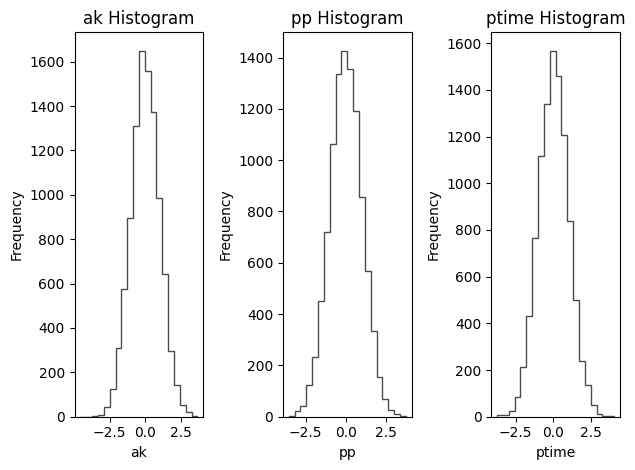

In [130]:
ak = df['ak']
pp = df['pp']
ptime = df['ptime']

plt.subplot(1,3,1)
plt.hist(ak, bins=20, color='black', alpha=0.7, histtype='step')
plt.xlabel("ak")
plt.ylabel("Frequency")
plt.title("ak Histogram")

plt.subplot(1,3,2)
plt.hist(pp, bins=20, color='black', alpha=0.7, histtype='step')
plt.xlabel("pp")
plt.ylabel("Frequency")
plt.title("pp Histogram")

plt.subplot(1,3,3)
plt.hist(ptime, bins=20, color='black', alpha=0.7, histtype='step')
plt.xlabel("ptime")
plt.ylabel("Frequency")
plt.title("ptime Histogram")

plt.tight_layout()

plt.show()

### Problem 1c
Perform the probability inrtegral transform and replicate the associated plots.
***

We can use `scipy.stats.norm.cdf()` function to apply the standard normal distribution to APT and store it in a variable called `U` which is holds the uniformly distributed data values.

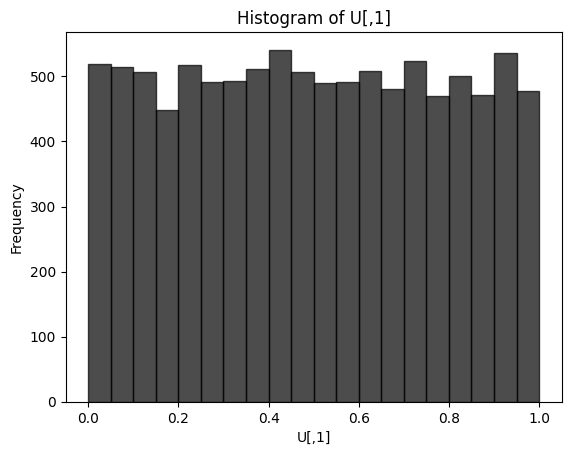

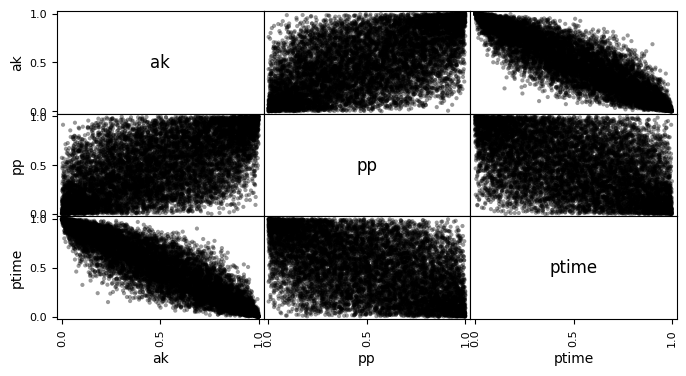

In [135]:
U = stats.norm.cdf(APT)
plt.hist(U[:,0], bins=20, color=['black'], alpha=0.7, histtype='bar', edgecolor='black')
plt.xlabel("U[,1]")
plt.ylabel("Frequency")
plt.title("Histogram of U[,1]")

columns = ['ak','pp','ptime']
drawScatter(U, columns)
plt.show()

As we can see above, the samples are still correlated as defined by `sigma`

### Problem 1d
Perform the inverse transform sampling
***


By using `stats.poisson.ppf` and `stats.norm.ppf` we can perform inverse transform sampling for `ak` `pp` and `ptime`.

the lambda values for `ak` and `pp` are the same ones Thomas Ward used.

Same for the mean and SD for `ptime`

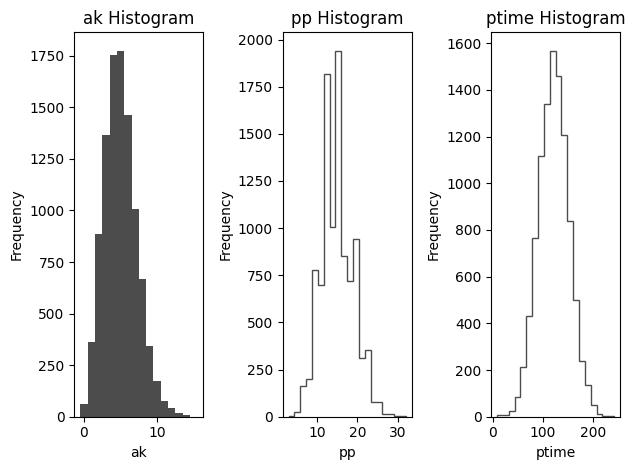

In [136]:
ak = stats.poisson.ppf(U[:,0], 5)
pp = stats.poisson.ppf(U[:,1], 15)
ptime = stats.norm.ppf(U[:,2], loc=120, scale=30)

bin_edges = np.arange(-0.5, ak.max() + 1.5, 1)
plt.subplot(1,3,1)
plt.hist(ak, bins=bin_edges, color='black', alpha=0.7, histtype='bar')
plt.xlabel("ak")
plt.ylabel("Frequency")
plt.title("ak Histogram")

plt.subplot(1,3,2)
plt.hist(pp, bins=20, color='black', alpha=0.7, histtype='step')
plt.xlabel("pp")
plt.ylabel("Frequency")
plt.title("pp Histogram")

plt.subplot(1,3,3)
plt.hist(ptime, bins=20, color='black', alpha=0.7, histtype='step')
plt.xlabel("ptime")
plt.ylabel("Frequency")
plt.title("ptime Histogram")

plt.tight_layout()


### Problem 1e
Replicate the final plot showcasing the correlations between the variables
***

To reiterate
```
ak = stats.poisson.ppf(U[:,0], 5)
pp = stats.poisson.ppf(U[:,1], 15)
ptime = stats.norm.ppf(U[:,2], loc=120, scale=30)

gs = np.random.normal(7.25, 0.875, 10000)
```
the four variables that we are working with have samples as defined above

The following plot shows the covarriance matrix `sigma` for the correlated variables and shows that `gs` is not correlated to any of them

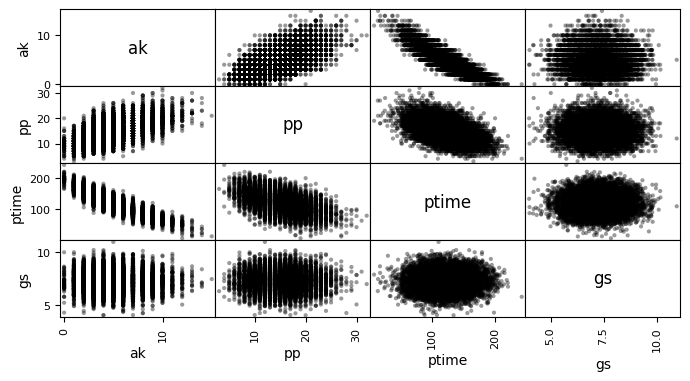

In [141]:
columns = ['ak','pp','ptime', 'gs']
finalMatrix = np.column_stack((ak,pp,ptime, gs))
drawScatter(finalMatrix, columns)

## Problem 2
You now pretend that the $n=4$
 dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called online learning setting). Introduce the index
 to represent the ith arriving data sample $x_i$

1. Write the expression of the sample correlation matrix (5 points)

2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from
 to
 (15 points)

 ***